# Carregamento de dados, armazenamento e formatos de arquivos

In [2]:
import pandas as pd
import numpy as np

## 6.1 Leitura e escrita de dados no formato texto

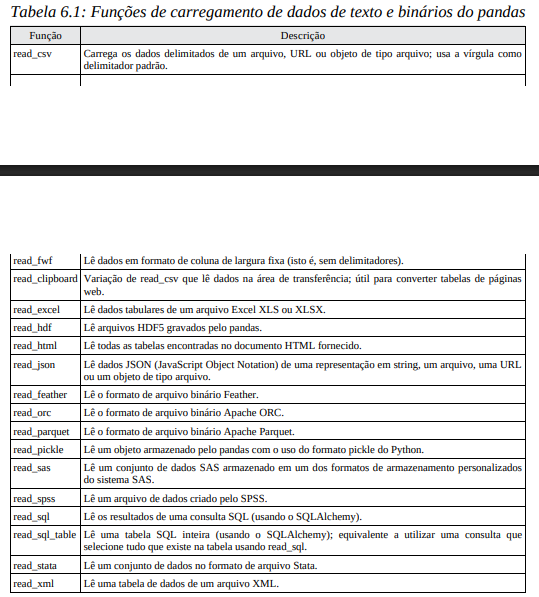

Seus argumentos
opcionais se enquadram em algumas categorias:

Indexação
Pode tratar uma ou mais colunas como o DataFrame retornado e define se
os nomes das colunas devem ser obtidos no arquivo, nos argumentos
fornecidos ou em nenhum dos dois.

Inferência de tipos e conversão de dados
Inclui conversões de valores definidas pelo usuário e uma lista
personalizada de marcadores de valores ausentes.

Parsing de data e hora
Inclui um recurso de combinação que pode combinar informações de data e
hora de várias colunas em uma única coluna no resultado.

Iteração
Suporte à iteração por blocos de arquivos muito grandes.

Problemas com dados sujos
Inclui pular linhas ou um rodapé, comentários, ou outros itens menores,
como dados numéricos com vírgulas para separar milhares.


In [4]:
df = pd.read_csv("ex1.csv")
df

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


Nem sempre os arquivos tem uma linha de cabeçalho.

Para ler esse arquivo, temos duas opções. Podemos permitir que o pandas
atribua nomes de coluna padrão ou especificar os nomes por conta própria:

In [6]:
pd.read_csv("ex2.csv", header=None)

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [7]:
pd.read_csv("ex2.csv", names=["a", "b", "c", "d", "message"])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


Suponhamos que você quisesse que a coluna message fosse o índice do
DataFrame retornado. Você pode indicar que deseja a coluna no índice 4 ou
nomear "message" usando o argumento `index_col`:

In [8]:
names = ["a", "b", "c", "d", "message"]
pd.read_csv("ex2.csv", names=names, index_col="message")

,a,b,c,d
message,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


Se quiser formar um índice hierárquico a partir de várias colunas, passe uma lista de
números ou nomes de colunas:

In [10]:
parsed = pd.read_csv("csv_mindex.csv", index_col=["key1","key2"])
parsed

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

Em alguns casos, uma tabela pode não ter um delimitador fixo, usando o
espaço em branco ou outro padrão para separar os campos. Considere um
arquivo de texto que tivesse esta aparência:

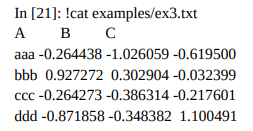

Embora você possa fazer algumas manipulações manualmente, os campos mostrados aqui estão separados por uma quantidade variável de espaços em branco. Nesses casos, podemos passar uma expressão regular como delimitador para `pandas.read_csv`. O exemplo anterior poderia usar a expressão regular *\s+* e, então, teríamos:

In [11]:
result = pd.read_csv("ex3.txt", sep="\s+")
result

,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


Já que havia um nome de coluna a menos em comparação com o número de
linhas de dados, pandas.read_csv infere que a primeira coluna deve ser o índice
do DataFrame nesse caso especial.

podemos ignorar a primeira, a terceria e a quarta linhas de um arquivo com `skiprows`:

In [12]:
pd.read_csv("ex4.csv", skiprows=[0,2,3])

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


A manipulação de valores ausentes é uma parte importante e frequentemente nuançada do processo de leitura de arquivos. Geralmente, os dados ausentes
não estão presentes (são strings vazias) ou aparecem marcados por algum valor de sentinela (placeholder). Por padrão, o pandas usa um conjunto de
sentinelas de ocorrência comum, como NA e NULL:

In [15]:
result = pd.read_csv("ex5.csv")
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


Lembre-se de que o pandas exibe os valores ausentes como NaN, logo, temos
dois valores nulos ou ausentes em result:

In [16]:
pd.isna(result)

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,True,False,False
2,False,False,False,False,False,False


A opção `na_values` recebe uma sequência de strings para serem adicionadas à lista padrão de strings reconhecidas como de ausência:

In [17]:
result = pd.read_csv("ex5.csv", na_values=["NULL"])
result

,something,a,b,c,d,message
0,one,1,2,3.0,4,NaN
1,two,5,6,NaN,8,world
2,three,9,10,11.0,12,foo


`pandas.read_csv` tem uma lista com várias representações padrão para o valor
NA, mas esses padrões podem ser desativados com a opção **`keep_default_na`**:

In [18]:
result2 = pd.read_csv("ex5.csv", keep_default_na=False)
result2

,something,a,b,c,d,message
0,one,1,2,3,4,NA
1,two,5,6,,8,world
2,three,9,10,11,12,foo


In [19]:
 result2.isna()

,something,a,b,c,d,message
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False


In [20]:
result3 = pd.read_csv("ex5.csv", keep_default_na=False, na_values=["NA"])
result3                                                            

,something,a,b,c,d,message
0,one,1,2,3,4,NaN
1,two,5,6,,8,world
2,three,9,10,11,12,foo


In [21]:
result3.isna()

,something,a,b,c,d,message
0,False,False,False,False,False,True
1,False,False,False,False,False,False
2,False,False,False,False,False,False


Sentinelas NA diferentes podem ser especificadas para cada coluna em um
dicionário:

In [23]:
sentinels = {"message": ["foo", "NA"], "something": ["two"]}
pd.read_csv("ex5.csv", na_values=sentinels, keep_default_na=False)

,something,a,b,c,d,message
0,one,1,2,3,4,NaN
1,NaN,5,6,,8,world
2,three,9,10,11,12,NaN
